## Model Training
#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [212]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [213]:
df = pd.read_csv('data/StudentsPerformance_cleaned.csv')

In [214]:
df.head()  # Display the first few rows of the dataframe to verify successful loading

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74,218.0,72.666667
1,female,group C,some college,standard,completed,69.0,90.0,88,247.0,82.333333
2,female,group B,master's degree,standard,none,90.0,95.0,93,278.0,92.666667
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44,148.0,49.333333
4,male,group C,some college,standard,none,76.0,78.0,75,229.0,76.333333


#### Preparing X and Y variables

In [215]:
df.drop(columns=['average','total_score'],axis=1, inplace=True)
X = df.drop(columns=['math_score'],axis=1)
y = df['math_score']

In [216]:
X

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72.0,74
1,female,group C,some college,standard,completed,90.0,88
2,female,group B,master's degree,standard,none,95.0,93
3,male,group A,associate's degree,free/reduced,none,57.0,44
4,male,group C,some college,standard,none,78.0,75
...,...,...,...,...,...,...,...
1013,female,group E,master's degree,standard,completed,99.0,95
1014,male,group C,high school,free/reduced,none,55.0,55
1015,female,group C,high school,free/reduced,completed,71.0,65
1016,female,group D,some college,standard,completed,78.0,77


In [217]:
y

0       72.0
1       69.0
2       90.0
3       47.0
4       76.0
        ... 
1013    88.0
1014    62.0
1015    59.0
1016    68.0
1017    77.0
Name: math_score, Length: 1018, dtype: float64

In [218]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [219]:
## Create column transormation function

num_features = X.select_dtypes(exclude=['O']).columns
cat_features = X.select_dtypes(include=['O']).columns
num_features, cat_features

(Index(['reading_score', 'writing_score'], dtype='object'),
 Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
        'test_preparation_course'],
       dtype='object'))

In [220]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [221]:
X = preprocessor.fit_transform(X)

In [222]:
X.shape

(1018, 19)

In [223]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.18760279,  0.38338577],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.41765934,  1.30186182],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.75934171,  1.62988899],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.11926631, -0.20706312],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.59762164,  0.58020207],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.14431344,  1.17065096]], shape=(1018, 19))

In [224]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Create an Evaluate Function to give all metrics after model Training

In [225]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [226]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.5030
- Mean Absolute Error: 4.4057
- R2 Score: 0.8697
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.0797
- Mean Absolute Error: 3.9556
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.6770
- Mean Absolute Error: 5.2798
- R2 Score: 0.8082
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.2805
- Mean Absolute Error: 4.9050
- R2 Score: 0.8172


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.5032
- Mean Absolute Error: 4.4047
- R2 Score: 0.8697
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.0816
- Mean Absolute Error: 3.9549
- R2 Score: 0.8803


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.9334
- Mean Absolute Error: 4.6743
- R2 Score: 0.8485
-----------------------

### Results

In [227]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.880423
2,Ridge,0.880332
7,CatBoosting Regressor,0.841706
5,Random Forest Regressor,0.838833
8,AdaBoost Regressor,0.826913
1,Lasso,0.817205
6,XGBRegressor,0.797363
3,K-Neighbors Regressor,0.783551
4,Decision Tree,0.709502


## Linear Regression

In [228]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


## Plot y_pred and y_test

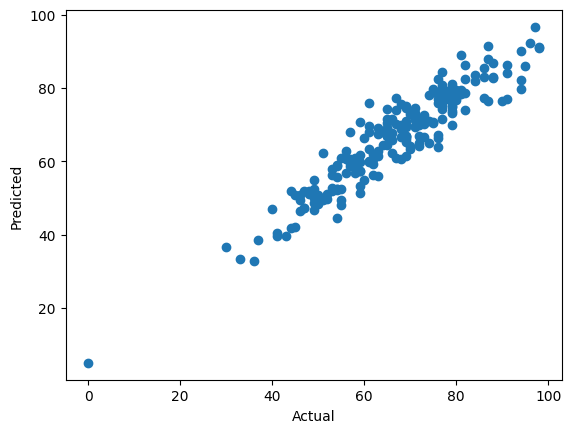

In [229]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='math_score'>

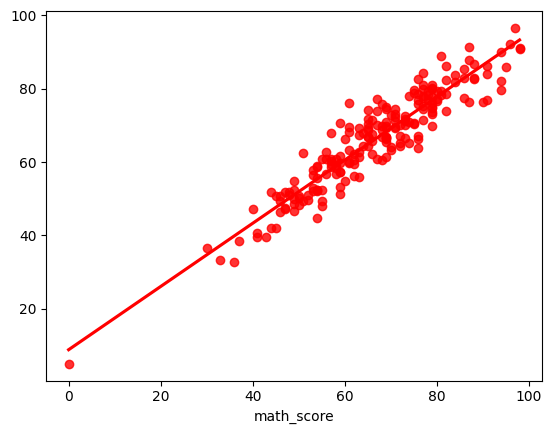

In [230]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')